In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
# Check if cuda is available
torch.cuda.is_available()

True

In [3]:
# get device id of GPU
torch.cuda.current_device()

0

In [4]:
# get device name of GPU
torch.cuda.get_device_name(0)

'Tesla T4'

In [5]:
# How much memory is cached 
torch.cuda.memory_cached()

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/torch/cuda/memory.py:416: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


0

In [6]:
# check how much memory allocated in GPU
torch.cuda.memory_allocated()

0

In [7]:
#cuda() function allocate variable to GPU
var1=torch.FloatTensor([1.0,2.0,3.0]).cuda()

In [8]:
var1

tensor([1., 2., 3.], device='cuda:0')

In [9]:
var1.device

device(type='cuda', index=0)

In [10]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train).cuda()
X_test=torch.FloatTensor(X_test).cuda()
y_train=torch.LongTensor(y_train).cuda()

In [15]:
# X_train is stored in GPU
X_train.device

device(type='cuda', index=0)

In [16]:
#### Creating Model with Pytorch
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [17]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [18]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [19]:
for i in model.parameters():
    print(i.is_cuda)

False
False
False
False
False
False


In [20]:
# By using cuda() function, model will run in GPU
model=model.cuda()

In [21]:
### Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [22]:
import time
start_time=time.time()
epochs=10000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss.item())
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(time.time()-start_time)

Epoch number: 1 and the loss : 3.457210063934326
Epoch number: 11 and the loss : 0.8019208908081055
Epoch number: 21 and the loss : 0.6090320348739624
Epoch number: 31 and the loss : 0.5917770862579346
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135972499847412
Epoch number: 101 and the loss : 0.5061255097389221
Epoch number: 111 and the loss : 0.49834102392196655
Epoch number: 121 and the loss : 0.4960552752017975
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.4756036698818207
Epoch number: 151 and the loss : 0.4833469092845917
Epoch number: 161 and the loss : 0.48827385902404785
Epoch number: 171 and the loss : 0.469334214925766
Epoch number: 181 and the loss : 0.4662630259990692
Epoch number: 191 and t

In [23]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

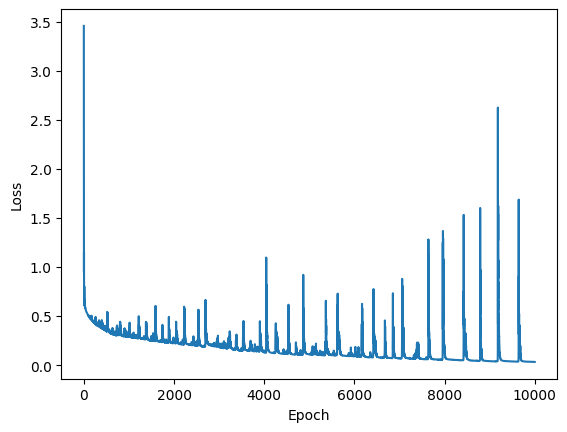

In [24]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [25]:
#### Method to find the probability of 2 classes for y_pred
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        y_probability = torch.sigmoid(y_pred)
        print(y_probability)

tensor([0.0151, 1.0000], device='cuda:0')
tensor([1.0000, 0.0504], device='cuda:0')
tensor([0.7491, 1.0000], device='cuda:0')
tensor([0.9998, 0.9873], device='cuda:0')
tensor([0.9996, 0.9988], device='cuda:0')
tensor([1.0000e+00, 1.5101e-06], device='cuda:0')
tensor([1.2138e-04, 1.0000e+00], device='cuda:0')
tensor([0.9780, 0.9997], device='cuda:0')
tensor([0.9978, 0.9872], device='cuda:0')
tensor([0.0503, 1.0000], device='cuda:0')
tensor([0.0010, 1.0000], device='cuda:0')
tensor([0.5995, 1.0000], device='cuda:0')
tensor([0.9998, 0.9190], device='cuda:0')
tensor([0.7273, 0.9341], device='cuda:0')
tensor([1.0000e+00, 7.5472e-18], device='cuda:0')
tensor([1.0000e+00, 5.8146e-04], device='cuda:0')
tensor([0.3184, 1.0000], device='cuda:0')
tensor([1.0000, 0.0020], device='cuda:0')
tensor([0.9798, 0.9981], device='cuda:0')
tensor([0.6471, 0.9488], device='cuda:0')
tensor([1.0000, 0.9984], device='cuda:0')
tensor([1.0000, 0.3334], device='cuda:0')
tensor([1.0000, 0.9998], device='cuda:0')
te

In [26]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
1
0
0
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
1
0
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
1
0
1
1
0
0
1
1
0
0
1
1
0
0
1
1
1
1
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0


In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[76, 31],
       [19, 28]])

Text(95.72222222222221, 0.5, 'Predicted Values')

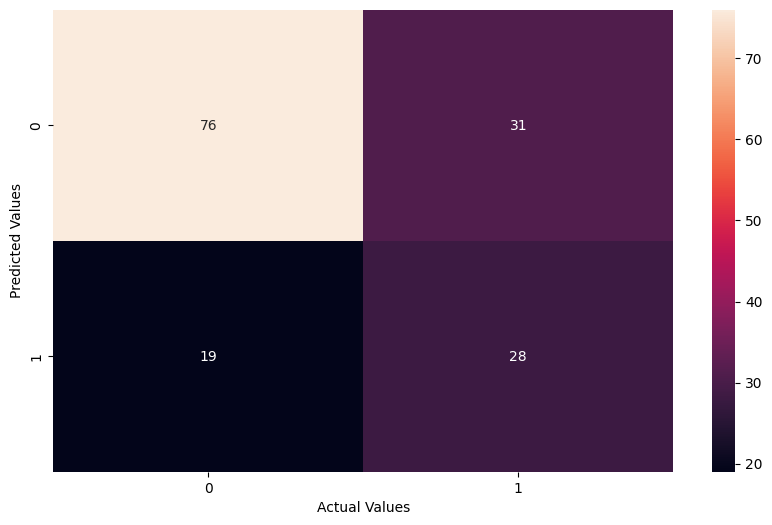

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [29]:
#### Save the model
torch.save(model,'model.pt')

In [30]:
#### Save And Load the model
model=torch.load('model.pt')

In [31]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]
#new_data=torch.tensor(lst1)
new_data=torch.FloatTensor(lst1).cuda()

In [32]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([ 7.3850, -0.0787], device='cuda:0')
0
